In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_classification


import sklearn
from sklearn.model_selection import train_test_split #train test package
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

In [3]:
df=pd.read_csv("C:/Users/my pc/Downloads/train.csv")

In [4]:
df2=pd.read_csv("C:/Users/my pc/Downloads/test.csv")

In [5]:
df3=pd.read_csv("C:/Users/my pc/Downloads/test.csv")

In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
(len(df) - df.count())/len(df)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [8]:
for i in range(0, df['PassengerId'].count()):
    df['RoomService'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']


In [9]:
df.drop(["PassengerId","Name","FoodCourt","ShoppingMall","Spa","VRDeck"],axis = 1, inplace=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,5450620.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,89885663.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,44994968.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,6850387.0,True


In [12]:
Cabin_split = df['Cabin'].str.split('/',expand = True)
df['Cabin']= Cabin_split[2]

In [15]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,Transported
0,1,0,0,2,39.0,0,0,0
1,0,0,1,2,24.0,0,1115,1
2,1,0,1,2,58.0,1,3688,0
3,1,0,1,2,33.0,0,3347,0
4,0,0,1,2,16.0,0,1624,1


In [14]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace = True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace = True)

#df['Cabin'] = df['Cabin'].str[:1]
# df['Cabin'] = pd.to_numeric(df['Cabin'].str.extract('(\d+)')[0],errors='coerce') 

lb = LabelEncoder()
df['HomePlanet'] = lb.fit_transform(df['HomePlanet'])
df['CryoSleep'] = lb.fit_transform(df['CryoSleep'])
df['Cabin'] = lb.fit_transform(df['Cabin'])
df['Destination'] = lb.fit_transform(df['Destination'])
df['VIP'] = lb.fit_transform(df['VIP'])
df['RoomService'] = lb.fit_transform(df['RoomService'])
df['Transported'] = lb.fit_transform(df['Transported'])

In [10]:
df.RoomService.unique().tolist()
df['RoomService'].max()

3837

In [16]:
for i in range(0, df['RoomService'].count()):
    if df['RoomService'][i] >= 1919:
        df['RoomService'][i] = 1 
        #print(df['Age'][i])
    else:
        df['RoomService'][i] = 0

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_14056/3175708226.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RoomService'][i] = 0
C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_14056/3175708226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RoomService'][i] = 1


In [19]:
for i in range(0, df['Age'].count()):
    if df['Age'][i] >= 18:
        df['Age'][i] = 1 
        #print(df['Age'][i])
    else:
        df['Age'][i] = 0

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_14056/2543435176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = 0
C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_14056/2543435176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = 1


In [20]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,Transported
0,1,0,0,2,0.0,0,0,0
1,0,0,1,2,0.0,0,0,1
2,1,0,1,2,0.0,1,1,0
3,1,0,1,2,0.0,0,1,0
4,0,0,1,2,0.0,0,0,1
...,...,...,...,...,...,...,...,...
8688,1,0,0,0,1.0,1,1,0
8689,0,1,1,1,1.0,0,0,0
8690,0,0,1,2,1.0,0,1,1
8691,1,0,1,0,1.0,0,1,0


In [45]:
for i in range(0, df2['PassengerId'].count()):
    df2['RoomService'] = df2['RoomService'] + df2['FoodCourt'] + df2['ShoppingMall'] + df2['Spa'] + df2['VRDeck']


In [ ]:
Cabin_split = df2['Cabin'].str.split('/',expand = True)
df2['Cabin']= Cabin_split[2]
df2.head()

In [46]:
df2['HomePlanet'].fillna(df2['HomePlanet'].mode()[0], inplace = True)
df2['Destination'].fillna(df2['Destination'].mode()[0], inplace = True)

#df2['Cabin'] = df2['Cabin'].str[:1]
#df2['Cabin'] = df2['Cabin'].str[:3]

lb = LabelEncoder()
df2['HomePlanet'] = lb.fit_transform(df2['HomePlanet'])
df2['CryoSleep'] = lb.fit_transform(df2['CryoSleep'])
df2['Cabin'] = lb.fit_transform(df2['Cabin'])
df2['Destination'] = lb.fit_transform(df2['Destination'])
df2['VIP'] = lb.fit_transform(df2['VIP'])
df2['RoomService'] = lb.fit_transform(df2['RoomService'])

In [47]:
for i in range(0, df2['RoomService'].count()):
    if df2['RoomService'][i] >= 1919:
        df2['RoomService'][i] = 1 
        #print(df['Age'][i])
    else:
        df2['RoomService'][i] = 0

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_16740/2607202312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['RoomService'][i] = 0
C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_16740/2607202312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['RoomService'][i] = 1


In [48]:
for i in range(0, df2['Age'].count()):
    if df2['Age'][i] >= 18:
        df2['Age'][i] = 1 
        #print(df['Age'][i])
    else:
        df2['Age'][i] = 0

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_16740/273937151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'][i] = 1
C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_16740/273937151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'][i] = 0


In [49]:
df2.drop(["PassengerId","Name", "FoodCourt","ShoppingMall","Spa","VRDeck"],axis = 1, inplace=True)
df2.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService
0,0,1,G/3/S,2,1.0,0,0
1,0,0,F/4/S,2,1.0,0,0
2,1,1,C/0/S,0,1.0,0,0
3,1,0,C/1/S,2,1.0,0,0
4,0,0,F/5/S,2,1.0,0,0


In [79]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,Transported
0,1,0,1,2,1,0,0,0
1,0,0,5,2,1,0,0,1
2,1,0,0,2,1,1,1,0
3,1,0,0,2,1,0,1,0
4,0,0,5,2,0,0,0,1


In [82]:
df2.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService
0,1,1,6,2,1,0,0
1,0,0,5,2,1,0,0
2,1,1,2,0,1,0,0
3,1,0,2,2,1,0,0
4,0,0,5,2,1,0,0


In [83]:
df.isnull().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
RoomService    0
Transported    0
dtype: int64

In [53]:
df2['Age'].fillna(df2['Age'].mode()[0], inplace=True)
df2['Cabin'].fillna(df2['Cabin'].mode()[0], inplace = True)
#df.dropna(inplace=True)

In [56]:
df['HomePlanet'] = df['HomePlanet'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)
#df['Cabin'] = df['Cabin'].astype(int)
df['Age'] = df['Age'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

df2['HomePlanet'] = df['HomePlanet'].astype(int)
df2['CryoSleep'] = df2['CryoSleep'].astype(int)
#df['Cabin'] = df['Cabin'].astype(int)
df2['Age'] = df2['Age'].astype(int)
df2['VIP'] = df2['VIP'].astype(int)

In [57]:
x = df.drop('Transported', axis=1)
x.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService
0,1,0,1,2,1,0,0
1,0,0,5,2,1,0,0
2,1,0,0,2,1,1,1
3,1,0,0,2,1,0,1
4,0,0,5,2,0,0,0


In [58]:
y = df['Transported']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int32

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6953, 7), (1739, 7), (6953,), (1739,))

In [1]:
x_train1 = x_train
y_train1 = y_train
x_test1 = x_test
y_test1 = y_test

x_train2 = x_train
y_train2 = df2


x_train1, y_train1 = make_regression(n_samples=10000, n_features=9, n_informative=20, noise=0.5, random_state=2)
x_test1, y_test1 = make_regression(n_samples=10000, n_features=9, n_informative=20, noise=0.5, random_state=2)

x_train1, y_train1 = make_regression(n_samples=10000, n_features=9, n_informative=20, noise=0.5, random_state=2)
x_test1, y_test1 = make_regression(n_samples=10000, n_features=9, n_informative=20, noise=0.5, random_state=2)

NameError: name 'x_train' is not defined

In [69]:
modelLR = LogisticRegression(max_iter=3000, penalty='l1',multi_class='ovr',class_weight='balanced',solver='liblinear')
modelLR.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000, multi_class='ovr',
                   penalty='l1', solver='liblinear')

In [70]:
y_predictLR = modelLR.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictLR)
accuracy
#0.7199539965497412

0.7199539965497412

In [71]:
cmLR = confusion_matrix(y_test, y_predictLR)
cmLR

array([[712, 168],
       [319, 540]], dtype=int64)

<Figure size 720x504 with 0 Axes>

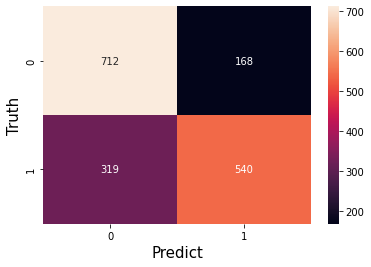

<Figure size 720x504 with 0 Axes>

In [72]:
sns.heatmap(cmLR, annot=True, fmt='3.0f')
plt.xlabel('Predict', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.figure(figsize=(10, 7))

The cross validated score for Logistic Regression is: 70.97


Text(0.5, 1.05, 'Confusion_matrix')

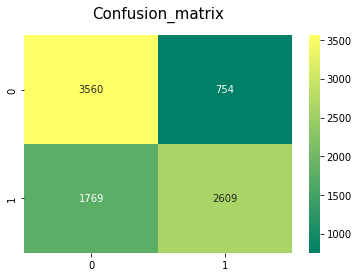

In [73]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(modelLR,x,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))
y_predLR = cross_val_predict(modelLR, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predLR),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [74]:
modelRFC = RandomForestClassifier(random_state=0, n_estimators = 100, min_samples_split = 6, min_samples_leaf = 3, max_depth = 120, bootstrap = True)
modelRFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=120, min_samples_leaf=3, min_samples_split=6,
                       random_state=0)

In [75]:
def mae(y_test, y_predictRFC):
    y_test, y_predictRFC = np.array(y_test), np.array(y_predictRFC)
    return np.mean(np.abs(y_test - y_predictRFC))

print(mae(y_test, y_predictRFC))

0.26279470960322027


In [53]:
#modelRFC = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=10)
#modelRFC = RandomForestClassifier(max_depth=2, random_state=0)
#modelRFC.fit(x_train, y_train)

In [76]:
y_predictRFC = modelRFC.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictRFC)
accuracy
#0.7372052903967797

0.7372052903967797

In [84]:
y_predictRFC1 = modelRFC.predict(df2)
y_predictRFC1

array([1, 0, 1, ..., 1, 0, 0])

In [103]:
output = pd.DataFrame({'PassengerId': df3.PassengerId, 'Transported': y_predictRFC1})
output['Transported'] = output['Transported'].replace({1: True, 0: False})
output.to_csv('submission3.csv', index=False)

In [85]:
cmRFC = confusion_matrix(y_test, y_predictRFC)
cmRFC

array([[736, 144],
       [313, 546]], dtype=int64)

The cross validated score for RFC is: 73.02


Text(0.5, 1.05, 'Confusion_matrix')

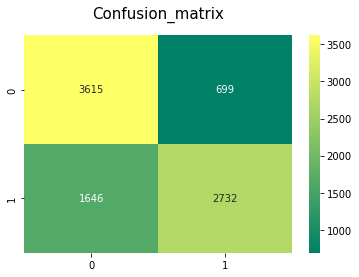

In [86]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_rfc=cross_val_score(modelRFC,x,y,cv=10,scoring='accuracy')
print('The cross validated score for RFC is:',round(result_rfc.mean()*100,2))
y_predRFC = cross_val_predict(modelRFC, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predRFC),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [87]:
modelXGB = xgb.XGBClassifier(learning_rate=0.05, max_depth=3, random_state=9, n_estimators=5, colsample_bytree=0.5) 
modelXGB.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=9, ...)

In [88]:
y_predictXGB = modelXGB.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictXGB)
accuracy
#0.7366302472685451

0.7366302472685451

In [89]:
mean_absolute_error(y_test, y_predictXGB)

0.26336975273145485

In [90]:
y_predictXGB1 = modelXGB.predict(df2)
y_predictXGB1

array([1, 0, 1, ..., 1, 0, 1])

In [91]:
cmXGB = confusion_matrix(y_test, y_predictXGB)
cmXGB

array([[737, 143],
       [315, 544]], dtype=int64)

The cross validated score for XGB is: 72.43


Text(0.5, 1.05, 'Confusion_matrix')

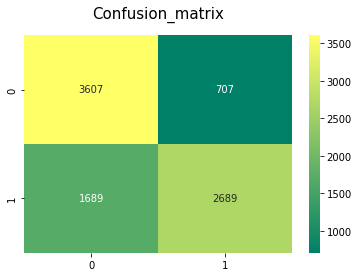

In [92]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_xgb=cross_val_score(modelXGB,x,y,cv=10,scoring='accuracy')
print('The cross validated score for XGB is:',round(result_xgb.mean()*100,2))
y_predXGB = cross_val_predict(modelXGB, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predXGB),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [99]:
modelKNN = KNeighborsClassifier(n_neighbors=20, algorithm='brute', p=1)
modelKNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=20, p=1)

In [100]:
y_predictKNN = modelKNN.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predictKNN)
accuracy
#0.7377803335250144

0.7377803335250144

In [101]:
cmKNN = confusion_matrix(y_test, y_predictKNN)
cmKNN

array([[740, 140],
       [316, 543]], dtype=int64)

The cross validated score for KNN is: 72.3


Text(0.5, 1.05, 'Confusion_matrix')

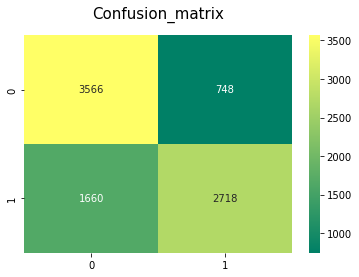

In [102]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(modelKNN,x,y,cv=10,scoring='accuracy')
print('The cross validated score for KNN is:',round(result_knn.mean()*100,2))
y_predKNN = cross_val_predict(modelKNN, x, y, cv=10)
sns.heatmap(confusion_matrix(y, y_predKNN),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [64]:
def get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(x_train, y_train)
    preds_val = model.predict(x_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [ ]:
# final_output = pd.DataFrame({'PassengerId': df3.PassengerId, 'Transported': y_predictRFC1})
# final_output.to_csv('submission1.csv', index=False)